In [15]:
import numpy as np
import pandas as pd
import uproot as ur
from numpy import random as npr
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcParams['font.size'] = 15

In [2]:
root_files = ! ls *.root

In [3]:
file = ur.open( root_files[0] )

In [4]:
file.classnames()

{'DF_2300238590827776;1': 'TDirectory',
 'DF_2300238590827776/O2collision_001;1': 'TTree',
 'DF_2300238590827776/O2filtertrack;1': 'TTree',
 'DF_2300238590827776/O2filtertrackextr;1': 'TTree',
 'DF_2300238590872672;1': 'TDirectory',
 'DF_2300238590872672/O2collision_001;1': 'TTree',
 'DF_2300238590872672/O2filtertrack;1': 'TTree',
 'DF_2300238590872672/O2filtertrackextr;1': 'TTree',
 'DF_2300238590885888;1': 'TDirectory',
 'DF_2300238590885888/O2collision_001;1': 'TTree',
 'DF_2300238590885888/O2filtertrack;1': 'TTree',
 'DF_2300238590885888/O2filtertrackextr;1': 'TTree',
 'DF_2300238590919936;1': 'TDirectory',
 'DF_2300238590919936/O2collision_001;1': 'TTree',
 'DF_2300238590919936/O2filtertrack;1': 'TTree',
 'DF_2300238590919936/O2filtertrackextr;1': 'TTree',
 'DF_2300238590971008;1': 'TDirectory',
 'DF_2300238590971008/O2collision_001;1': 'TTree',
 'DF_2300238590971008/O2filtertrack;1': 'TTree',
 'DF_2300238590971008/O2filtertrackextr;1': 'TTree',
 'DF_2300238590997568;1': 'TDirecto

In [5]:
selected_tree = "DF_2300238590827776/O2collision_001"
file[ selected_tree ].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fIndexBCs            | int32_t                  | AsDtype('>i4')
fPosX                | float                    | AsDtype('>f4')
fPosY                | float                    | AsDtype('>f4')
fPosZ                | float                    | AsDtype('>f4')
fCovXX               | float                    | AsDtype('>f4')
fCovXY               | float                    | AsDtype('>f4')
fCovYY               | float                    | AsDtype('>f4')
fCovXZ               | float                    | AsDtype('>f4')
fCovYZ               | float                    | AsDtype('>f4')
fCovZZ               | float                    | AsDtype('>f4')
fFlags               | uint16_t                 | AsDtype('>u2')
fChi2                | float                    | AsDtype('>f4')
fNumContrib          | uint16_t                 | AsDtype(

In [6]:
extr_list = file.keys( filter_name = r"*O2filtertrackextr" )

In [7]:
single_df = file[ extr_list[0] ].arrays(library="pd")
single_df

,fPt,fEta,fCharge,fDcaXY,fDcaZ,fSigmaDcaXY2,fSigmaDcaZ2,fNsigmaTPCpi,fNsigmaTPCka,fNsigmaTPCpr,fNsigmaTOFpi,fNsigmaTOFka,fNsigmaTOFpr
0,0.755864,-0.412664,-1,-0.009506,0.001290,0.000016,0.000019,0.747714,-1.404644,-7.891112,2.037047,-20.068079,-44.163731
1,0.663068,0.598317,1,0.004326,-0.001262,0.000028,0.000036,1.840203,-0.856808,-8.746990,2.117946,-25.464684,-52.459072
2,0.465013,0.462649,-1,0.009618,-0.001794,0.000100,0.000121,54.468903,22.347868,-1.110935,-999.000000,-999.000000,-999.000000
3,0.351989,-0.177954,-1,0.013927,-0.003654,0.000044,0.000049,-0.477576,-10.363797,-12.495899,-999.000000,-999.000000,-999.000000
4,0.434466,0.289459,-1,0.005372,0.001822,0.000039,0.000045,-0.658317,-7.938647,-14.160391,-0.196841,-26.088795,-63.488323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67068,0.488095,-0.527648,1,-0.000526,-0.000548,0.000080,0.000101,50.725773,24.870630,0.006216,-999.000000,-999.000000,-999.000000
67069,0.820435,0.438210,-1,0.000657,-0.000478,0.000020,0.000024,1.262884,-0.104793,-6.574961,-999.000000,-999.000000,-999.000000
67070,0.607351,0.415359,1,-0.001284,0.002701,0.000024,0.000027,0.016883,-3.951209,-11.577621,-999.000000,-999.000000,-999.000000
67071,0.311997,-0.404920,1,0.020035,0.036706,0.000081,0.000093,-1.532226,-12.349394,-12.766997,-999.000000,-999.000000,-999.000000


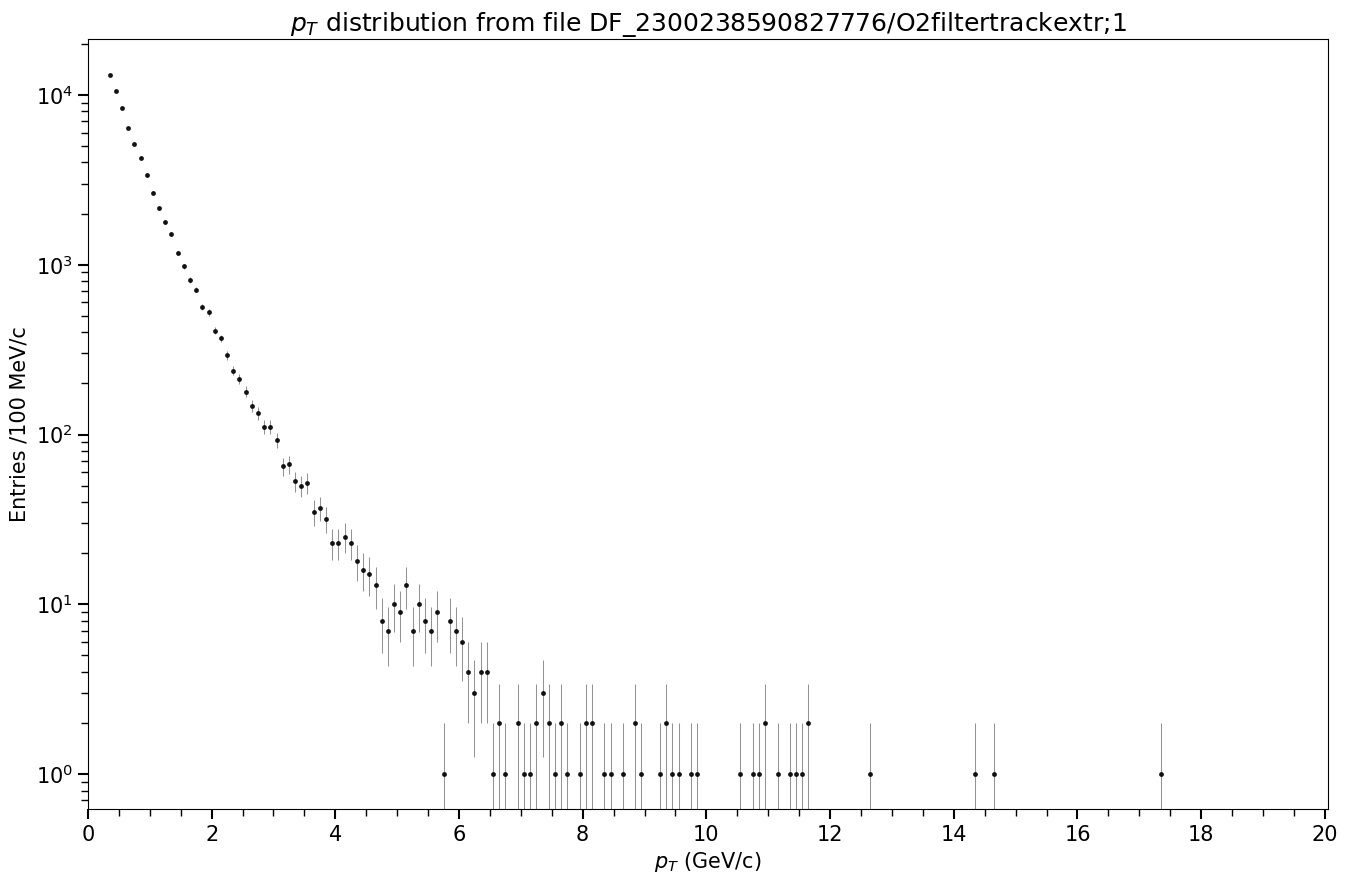

In [8]:
max_lim = 20.05
data = single_df[ 'fPt' ]
bin_edges = np.arange( start = data.min(), stop = data.max(), step = 0.1 )
hist, bin_edges = np.histogram( a = data, bins = bin_edges )
errors = np.sqrt( hist )
x_values = ( bin_edges[:-1] + bin_edges[1:] ) / 2.
fig, ax = plt.subplots( figsize=( 16, 10 ) )
ax.errorbar( x = x_values , y = hist, yerr = errors, alpha=0.85, color='black', ecolor='gray', elinewidth=0.75, fmt='o', markersize=2.5 )
ax.set_xlim(0, max_lim)
ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(2.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params( which = 'major', length = 7.5, width = 1.5 )
ax.tick_params( which = 'minor', length = 5, width = 1 )
ax.set_title( r"$p_T$ distribution from file " +  extr_list[0] )
ax.set_xlabel( r'$p_T$ (GeV/c)')
ax.set_ylabel( r"Entries /100 MeV/c")
plt.show()

In [9]:
multi_df = pd.concat( [ file[ extr ].arrays(library="pd") for extr in extr_list ] )

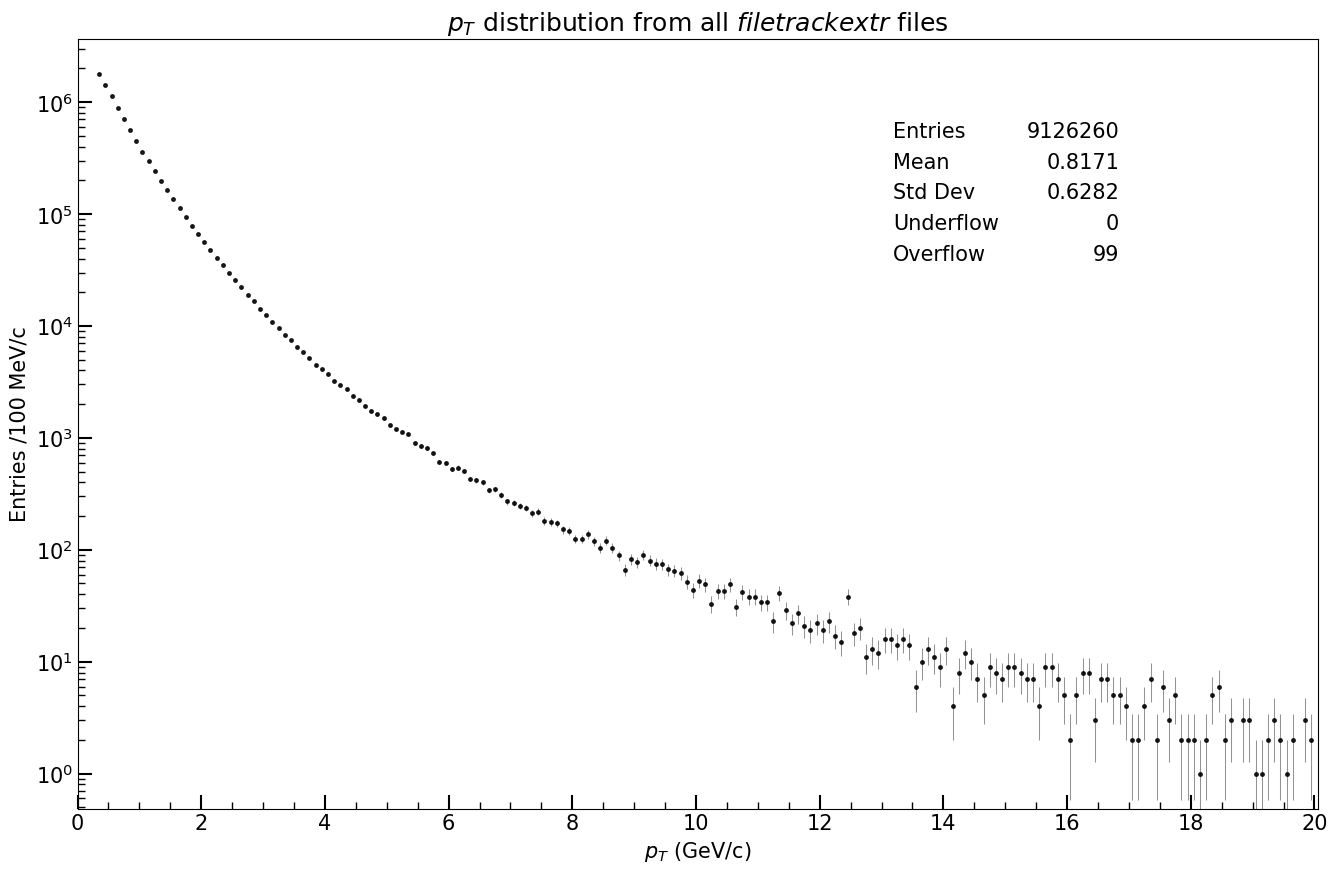

In [10]:
data = multi_df[ 'fPt' ]
bin_edges = np.arange( start = data.min(), stop = data.max(), step = 0.1 )
hist, bin_edges = np.histogram( a = data, bins = bin_edges )
errors = np.sqrt( hist )
x_values = ( bin_edges[:-1] + bin_edges[1:] ) / 2.
fig, ax = plt.subplots( figsize=( 16, 10 ) )
ax.errorbar( x = x_values , y = hist, yerr = errors, alpha=0.85, color='black', ecolor='gray', elinewidth=0.75, fmt='o', markersize=2.5 )
ax.set_xlim(0, max_lim)
ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(2.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
ax.set_title( r"$p_T$ distribution from all $filetrackextr$ files" )
ax.set_xlabel( r'$p_T$ (GeV/c)')
ax.set_ylabel( r"Entries /100 MeV/c")
ax.table( 
    cellText = [[f"{data.shape[0]}"],[ f"{data[data < max_lim].mean():.4f}"], [f"{data[data < max_lim].std():.4f}"], [f"{data[data < 0].shape[0]}"], [f"{data[data > max_lim].shape[0]}"] ],
    # cellText = [[f"{data.shape[0]}"],[ f"{data[data < max_lim].mean():.4f}"], [f"{data.std():.4f}"], [f"{data[data < 0].shape[0]}"], [f"{data[data > max_lim].shape[0]}"] ],
    rowLabels = [ 'Entries', 'Mean', 'Std Dev', 'Underflow', 'Overflow'],
    loc = 'upper right',
    bbox = [ 0.75, 0.7, 0.1, 0.2 ],
    edges = 'open',
    rowLoc = 'left',
    )

plt.show()

In [11]:
filter_list = file.keys( filter_name = r"*O2filtertrack" )
filter_df = pd.concat( [ file[ filt ].arrays(library="pd") for filt in filter_list ] )

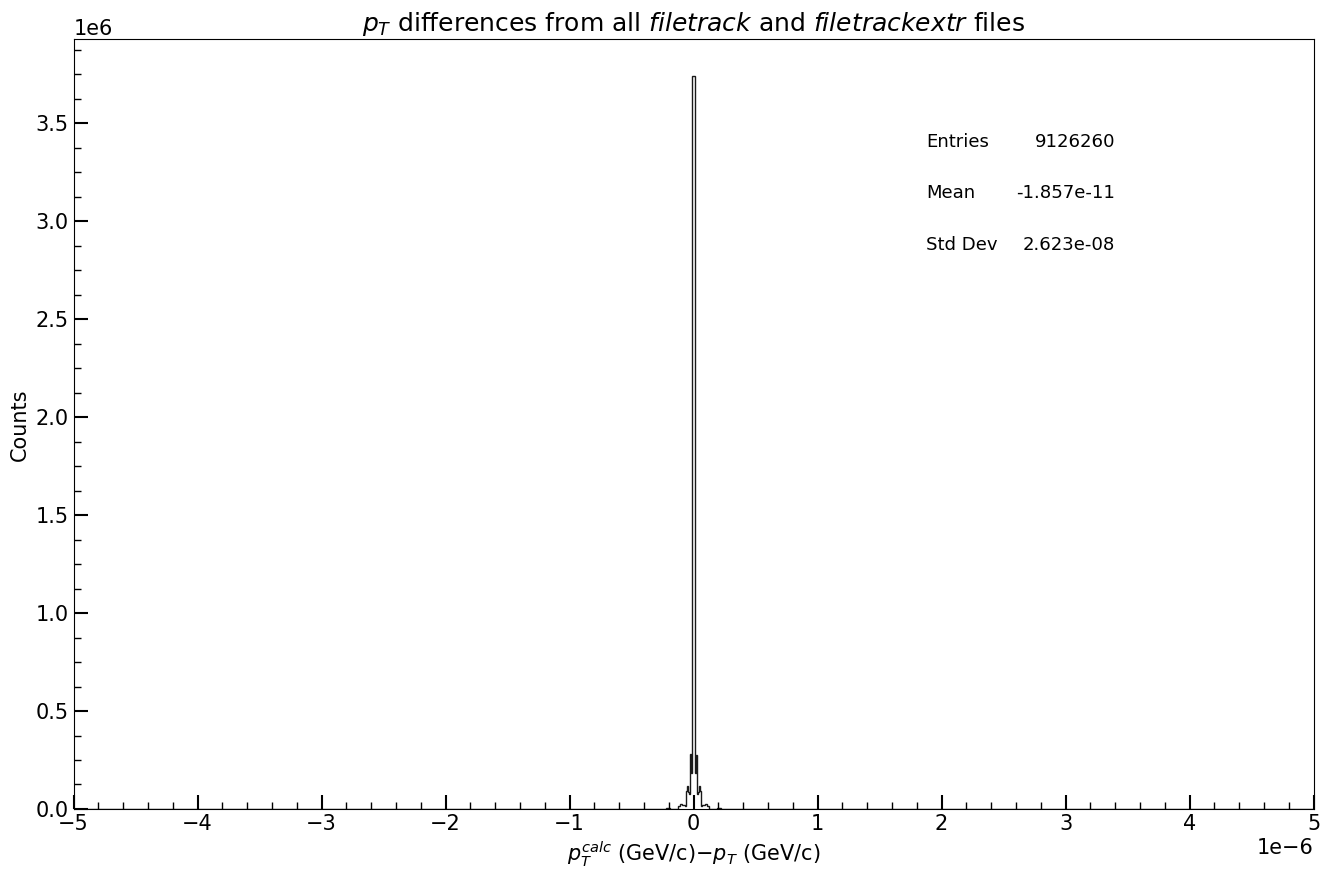

In [12]:
pt = multi_df[ 'fPt' ]
spt = 1. / np.abs( filter_df[ 'fSigned1Pt' ] )

data = spt - pt

# bin_edges = np.linspace( start = data.min(), stop = data.max(), num = 30 )
bin_edges = np.hstack([- np.logspace( -8, -5 ), np.logspace( -8, -5 )])
bin_edges.sort()

xl = 5e-6
fig, ax = plt.subplots( figsize=( 16, 10 ) )
ax.hist( x = data, bins = bin_edges, edgecolor='black', alpha =0.9, histtype = 'step')
ax.set_xlim(-xl, xl)
# ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(xl/5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5e5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
ax.set_title( r"$p_T$ differences from all $filetrack$ and $filetrackextr$ files" )
ax.set_xlabel( r'$p_T^{calc}$ (GeV/c)$-p_T$ (GeV/c)')
ax.set_ylabel( r"Counts")
ax.table( 
    cellText = [[f"{data.shape[0]}"],[ f"{data.mean():.3e}"], [f"{data.std():.3e}"]],
    rowLabels = [ 'Entries', 'Mean', 'Std Dev'],
    loc = 'upper right',
    bbox = [ 0.75, 0.7, 0.1, 0.2 ],
    edges = 'open',
    rowLoc = 'left',
    )

plt.show()

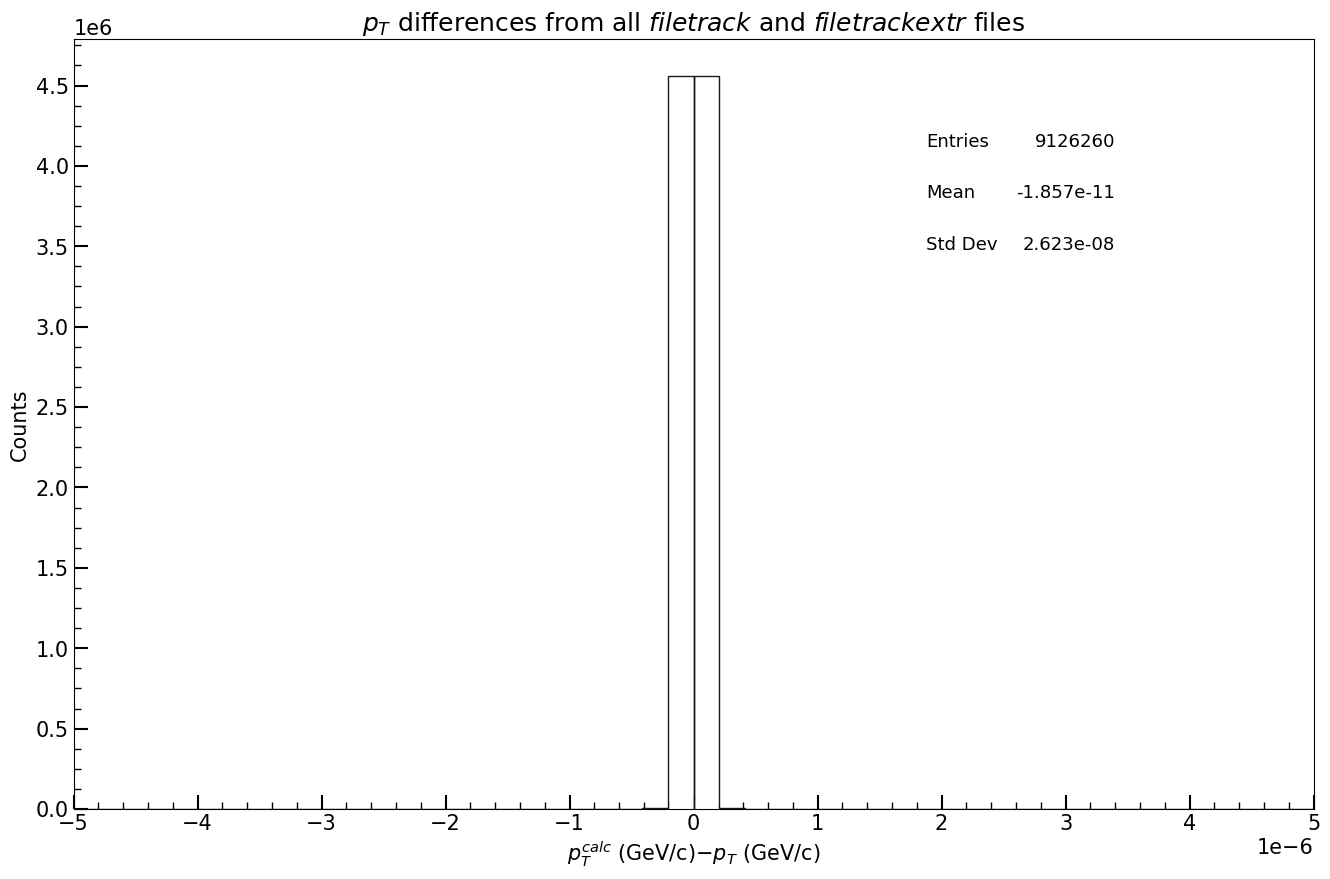

In [13]:
xl = 5e-6

# bin_edges = np.linspace( start = -xl, stop = +xl, num = 50 )
bin_edges = np.hstack([np.linspace( start = -xl, stop = 0, num = 25 ), np.linspace( start = -0, stop = +xl, num = 25 )])

fig, ax = plt.subplots( figsize=( 16, 10 ) )
ax.hist( x = data, bins = bin_edges, edgecolor='black', alpha =0.9, histtype = 'step', align = 'mid', fill = True, facecolor = 'white')
ax.set_xlim(-xl, xl)
# ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(xl/5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5e5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
ax.set_title( r"$p_T$ differences from all $filetrack$ and $filetrackextr$ files" )
ax.set_xlabel( r'$p_T^{calc}$ (GeV/c)$-p_T$ (GeV/c)')
ax.set_ylabel( r"Counts")
ax.table( 
    cellText = [[f"{data.shape[0]}"],[ f"{data.mean():.3e}"], [f"{data.std():.3e}"]],
    rowLabels = [ 'Entries', 'Mean', 'Std Dev'],
    loc = 'upper right',
    bbox = [ 0.75, 0.7, 0.1, 0.2 ],
    edges = 'open',
    rowLoc = 'left',
    )

plt.show()

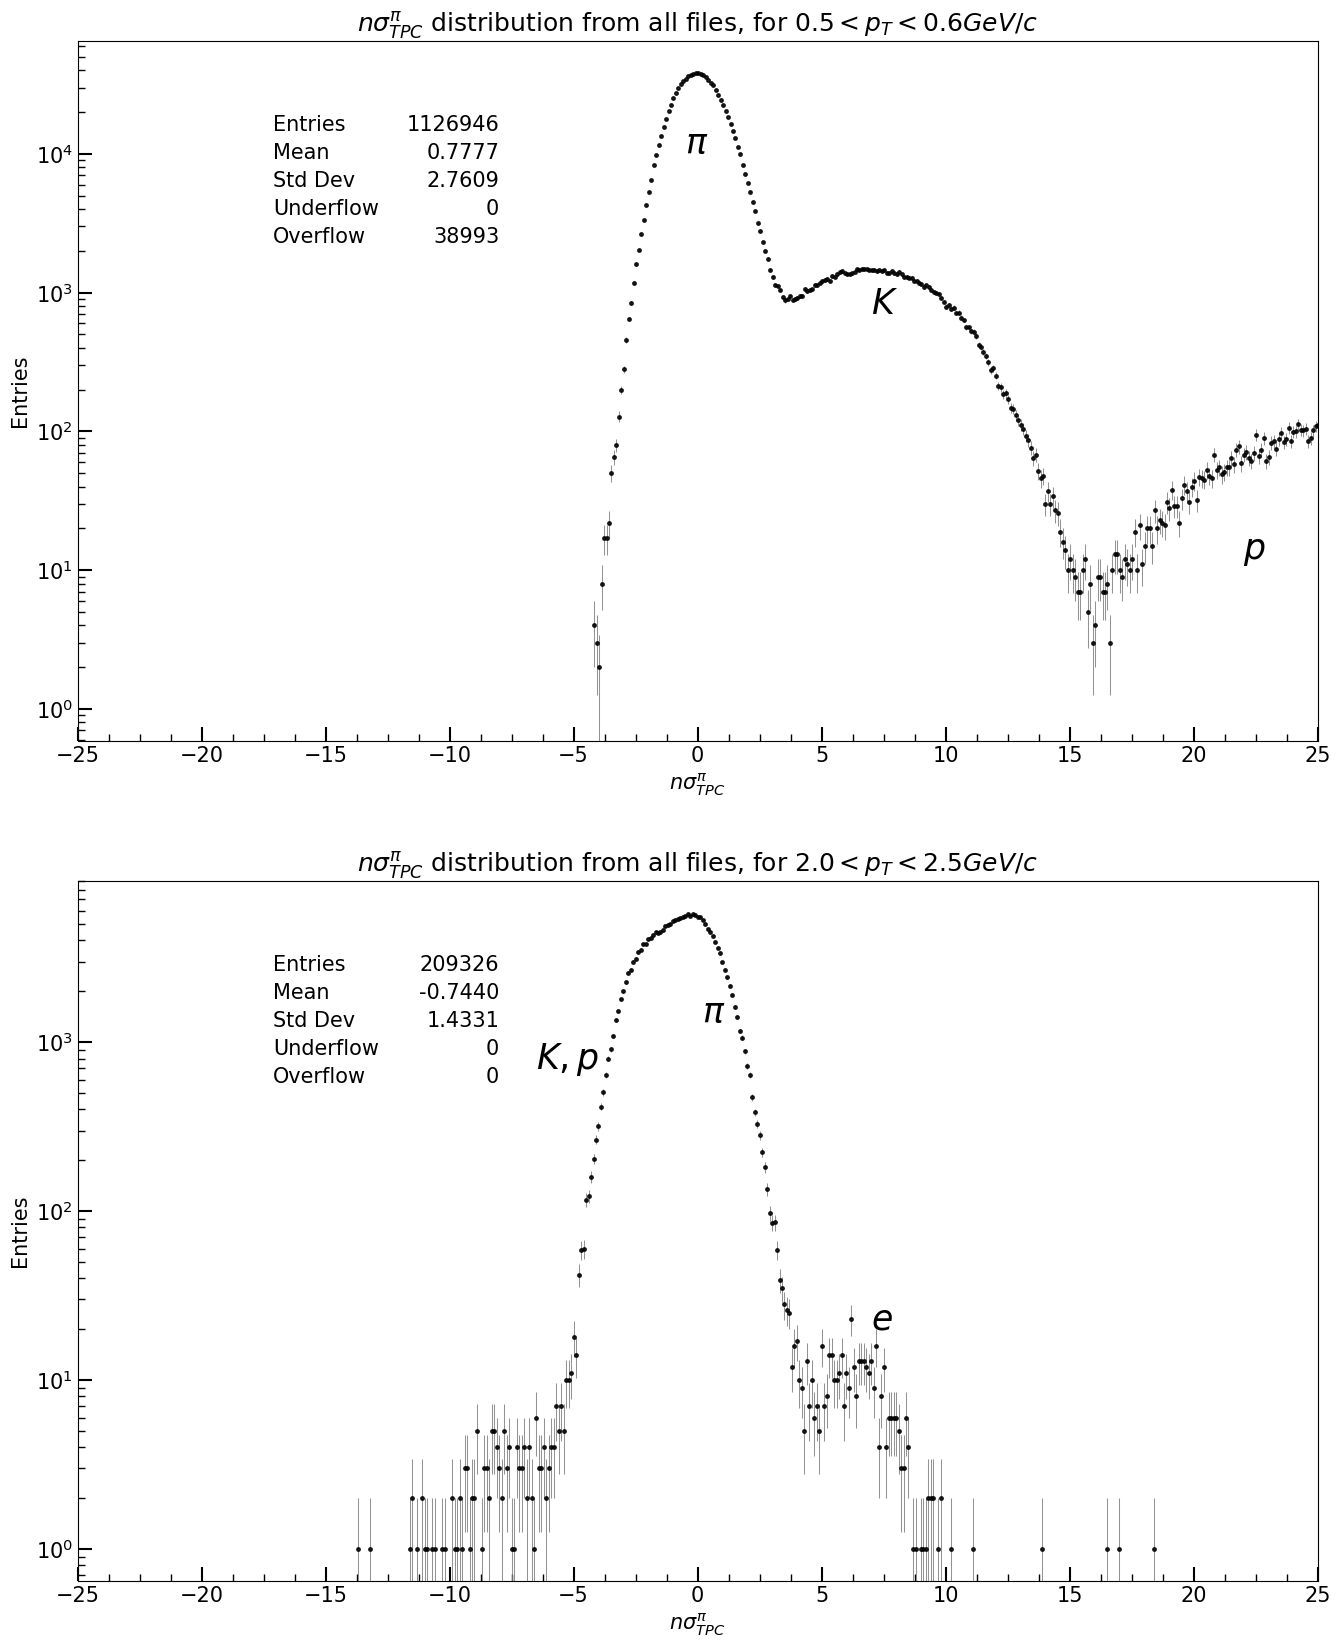

In [39]:
# point 2 TPC and TOF PID informations
# Time Projection Chamber (used to determin the TOF for PID)
# Time Of Flight
# Particles IDentification

# NsigmaTPCpi is the difference between the measured and expected signal for a pion (with given pt), in number of sd
# the other (fNsigmaTPCka and fNsigmaTPCpr) are the same operation given measures of TPC and expected results for KAons and PRotons

# filtering data in different regions of pt
data = multi_df[ multi_df[ 'fPt' ].between( 0.5, 0.6 ) ][ 'fNsigmaTPCpi' ]


def root_histo( ax, data, max_lim = data.max(), min_lim = data.min(), x_tick_loc = 2., x_tick_num = 4, box_c = [ 0.75, 0.7, 0.1, 0.2 ] ) :
    bin_edges = np.arange( start = data.min(), stop = data.max(), step = 0.1 )
    hist, bin_edges = np.histogram( a = data, bins = bin_edges )
    errors = np.sqrt( hist )
    x_values = ( bin_edges[:-1] + bin_edges[1:] ) / 2.
    ax.errorbar( x = x_values , y = hist, yerr = errors, alpha=0.85, color='black', ecolor='gray', elinewidth=0.75, fmt='o', markersize=2.5 )
    ax.set_xlim( min_lim, max_lim )
    ax.set_yscale('log')
    ax.xaxis.set_major_locator(MultipleLocator(x_tick_loc))
    ax.xaxis.set_minor_locator(AutoMinorLocator(x_tick_num))
    ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
    ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
    ax.table( 
        cellText = [[f"{data.shape[0]}"],[ f"{data[data < max_lim].mean():.4f}"], [f"{data[data < max_lim].std():.4f}"], [f"{data[data < min_lim ].shape[0]}"], [f"{data[data > max_lim].shape[0]}"] ],
        rowLabels = [ 'Entries', 'Mean', 'Std Dev', 'Underflow', 'Overflow'],
        bbox = box_c,
        edges = 'open',
        rowLoc = 'left',
        )
    
fig, axs = plt.subplots( ncols = 1, nrows= 2, figsize=( 16, 20 ) )
root_histo( axs[0], data, x_tick_loc = 5., max_lim = 25, min_lim = -25, box_c = [ 0.25, 0.7, 0.1, 0.2 ] )
axs[0].set_title( r"$n\sigma_{TPC}^{\pi}$ distribution from all files, for $0.5 < p_{T} < 0.6 GeV/c$" )
axs[0].set_xlabel( r'$n\sigma_{TPC}^{\pi}$')
axs[0].set_ylabel( r"Entries")
axs[0].text( -0.5, 1e+4, r'$\pi$', size = 25 )
axs[0].text( 7, 0.7e+3, r'$K$', size = 25 )
axs[0].text( 22, 1.2e+1, r'$p$', size = 25 )

data = multi_df[ multi_df[ 'fPt' ].between( 2, 2.5 ) ][ 'fNsigmaTPCpi' ]
root_histo( axs[1], data, x_tick_loc = 5., max_lim = 25, min_lim = -25, box_c = [ 0.25, 0.7, 0.1, 0.2 ] )
axs[1].set_title( r"$n\sigma_{TPC}^{\pi}$ distribution from all files, for $2.0 < p_{T} < 2.5 GeV/c$" )
axs[1].set_xlabel( r'$n\sigma_{TPC}^{\pi}$')
axs[1].set_ylabel( r"Entries")
axs[1].text( 0.2, 1.3e+3, r'$\pi$', size = 25 )
axs[1].text( -6.5, 0.7e+3, r'$K, p$', size = 25 )
axs[1].text( 7, 0.2e+2, r'$e$', size = 25 )

plt.show()

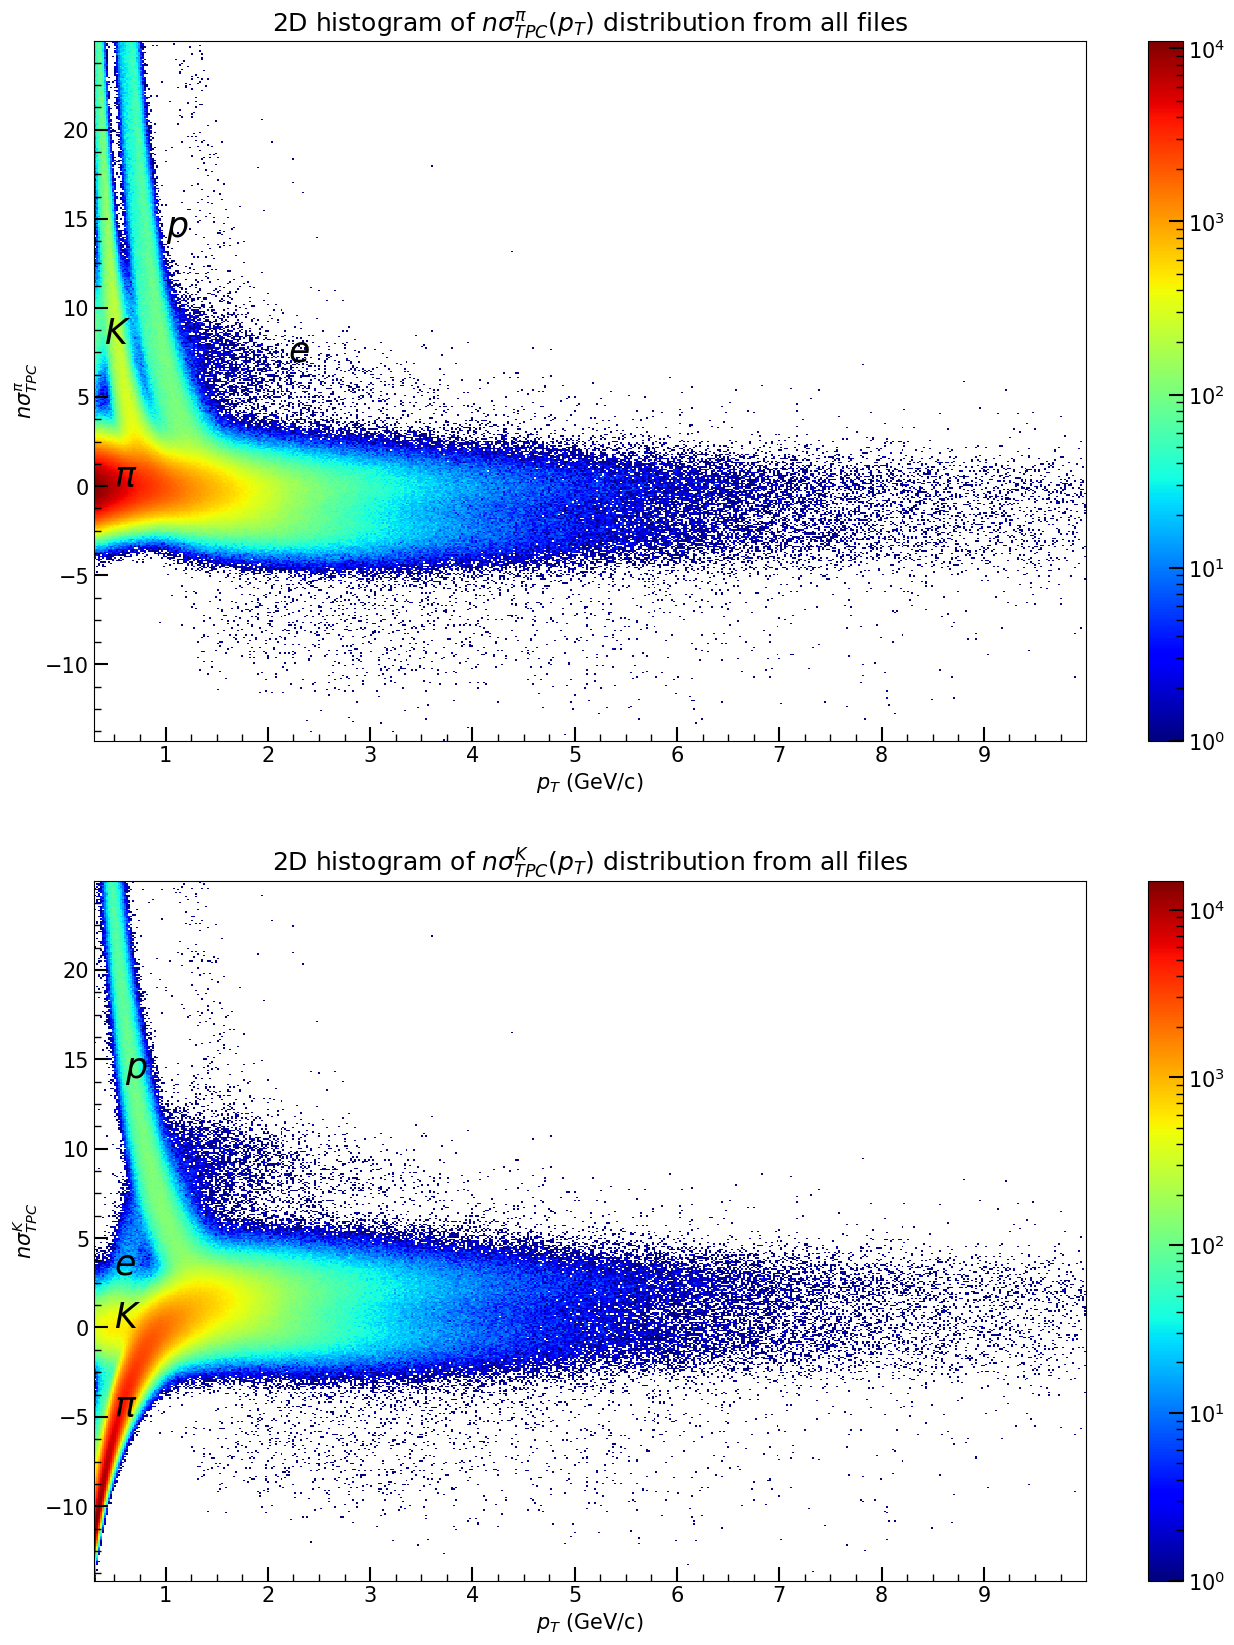

In [118]:
# NsigmaTPCpi function of pT plot
from matplotlib.colors import LogNorm
# cut for visualization and computatin optim.
x_cut = (0, 10)
y_cut = ( -15, 25 )
# reducing dataset for the cut
reduced_df = multi_df.loc[ (multi_df[ 'fNsigmaTPCpi' ].between( y_cut[0], y_cut[1] )) & (multi_df[ 'fPt' ].between( x_cut[0], x_cut[1] )) ]

def root_histo2d( ax, x, y, x_tick_loc = 1., y_tick_loc = 5, bins = ( 500, 500 ), double_ticks = False ) :
    h = ax.hist2d( x = x, y = y, norm=LogNorm(), bins = bins, cmap = 'jet' )
    cbar = fig.colorbar( h[3], ax = ax )
    cbar.ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
    cbar.ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
    ax.xaxis.set_major_locator(MultipleLocator(x_tick_loc))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_major_locator(MultipleLocator(y_tick_loc))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    if ( double_ticks ) :
        ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5, right= True, top = True )
        ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1, right= True, top = True )
    else :
        ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
        ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
    

fig, axs = plt.subplots( nrows = 2, ncols = 1, figsize=( 16, 20 ) )
root_histo2d( axs[0], x = reduced_df[ 'fPt' ], y = reduced_df[ 'fNsigmaTPCpi' ] )
axs[ 0 ].set_title( r"2D histogram of $n\sigma_{TPC}^{\pi}(p_T)$ distribution from all files" )
axs[ 0 ].set_xlabel( r'$p_T$ (GeV/c)')
axs[ 0 ].set_ylabel( r"$n\sigma_{TPC}^{\pi}$")
axs[0].text( 0.5, 0, r'$\pi$', size = 25 )
axs[0].text( 0.4, 8, r'$K$', size = 25 )
axs[0].text( 1, 14, r'$p$', size = 25 )
axs[0].text( 2.2, 7, r'$e$', size = 25 )

# new y values reduction
reduced_df = multi_df.loc[ (multi_df[ 'fNsigmaTPCka' ].between( y_cut[0], y_cut[1] )) & (multi_df[ 'fPt' ].between( x_cut[0], x_cut[1] )) ]

root_histo2d( axs[1], x = reduced_df[ 'fPt' ], y = reduced_df[ 'fNsigmaTPCka' ] )
axs[ 1 ].set_title( r"2D histogram of $n\sigma_{TPC}^{K}(p_T)$ distribution from all files" )
axs[ 1 ].set_xlabel( r'$p_T$ (GeV/c)')
axs[ 1 ].set_ylabel( r"$n\sigma_{TPC}^{K}$")
axs[1].text( 0.5, -5, r'$\pi$', size = 25 )
axs[1].text( 0.5, 0, r'$K$', size = 25 )
axs[1].text( 0.6, 14, r'$p$', size = 25 )
axs[1].text( 0.5, 3, r'$e$', size = 25 )


plt.show()

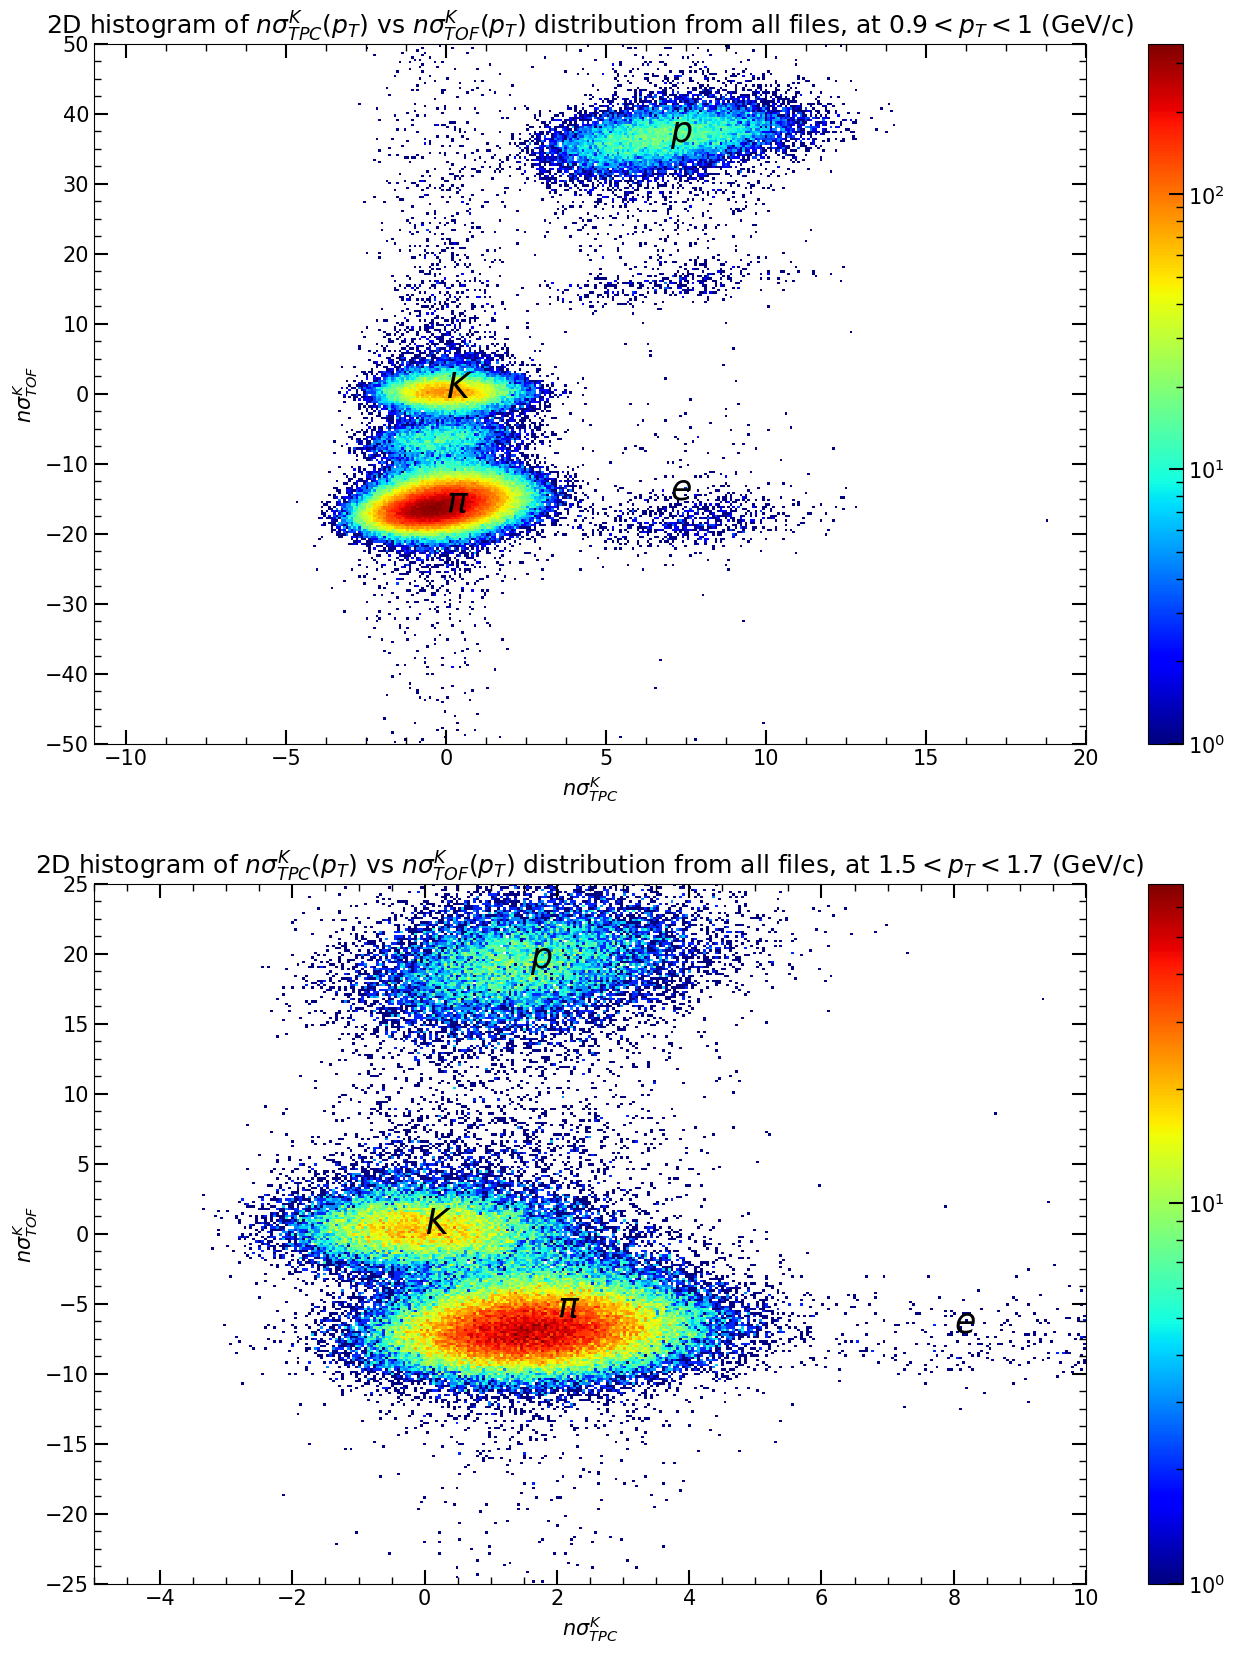

In [119]:
# coparing TOF and NsigmaTPCka

# cut for visualization and computatin optim.
x_cut = (-11, 20)
y_cut = ( -50, 50 )
pt_cut = ( 0.9, 1 )
# reducing dataset for the cut
reduced_df = multi_df.loc[ (multi_df[ 'fNsigmaTPCka' ].between( x_cut[0], x_cut[1] )) 
                            & (multi_df[ 'fNsigmaTOFka' ].between( y_cut[0], y_cut[1] ))
                            & (multi_df[ 'fPt' ].between( pt_cut[0], pt_cut[1] ))]

fig, axs = plt.subplots( nrows = 2, ncols = 1, figsize=( 16, 20 ) )
root_histo2d( axs[0], y = reduced_df[ 'fNsigmaTOFka' ], x = reduced_df[ 'fNsigmaTPCka' ], x_tick_loc = 5, y_tick_loc = 10, bins = ( 300, 300 ), double_ticks = True )
axs[ 0 ].set_title( r"2D histogram of $n\sigma_{TPC}^{K}(p_T)$ vs $n\sigma_{TOF}^{K}(p_T)$ distribution from all files, at $0.9 <p_T <1$ (GeV/c)" )
axs[ 0 ].set_ylabel( r'$n\sigma_{TOF}^{K}$')
axs[ 0 ].set_ylim( y_cut )
axs[ 0 ].set_xlabel( r"$n\sigma_{TPC}^{K}$")
axs[ 0 ].set_xlim( x_cut )
axs[0].text( 0, -17, r'$\pi$', size = 25 )
axs[0].text( 0, -0.5, r'$K$', size = 25 )
axs[0].text( 7, 36, r'$p$', size = 25 )
axs[0].text( 7, -15, r'$e$', size = 25 )

# new y values reduction
x_cut = (-5, 10)
y_cut = ( -25, 25 )
pt_cut = ( 1.5, 1.7 )
# reducing dataset for the cut
reduced_df = multi_df.loc[ (multi_df[ 'fNsigmaTPCka' ].between( x_cut[0], x_cut[1] )) 
                            & (multi_df[ 'fNsigmaTOFka' ].between( y_cut[0], y_cut[1] ))
                            & (multi_df[ 'fPt' ].between( pt_cut[0], pt_cut[1] ))]

root_histo2d( axs[1], y = reduced_df[ 'fNsigmaTOFka' ], x = reduced_df[ 'fNsigmaTPCka' ], x_tick_loc = 2, y_tick_loc = 5, bins = ( 300, 300 ), double_ticks = True )
axs[ 1 ].set_title( r"2D histogram of $n\sigma_{TPC}^{K}(p_T)$ vs $n\sigma_{TOF}^{K}(p_T)$ distribution from all files, at $1.5 <p_T <1.7$ (GeV/c)" )
axs[ 1 ].set_ylabel( r'$n\sigma_{TOF}^{K}$')
axs[ 1 ].set_ylim( y_cut )
axs[ 1 ].set_xlabel( r"$n\sigma_{TPC}^{K}$")
axs[ 1 ].set_xlim( x_cut )
axs[1].text( 2, -6, r'$\pi$', size = 25 )
axs[1].text( 0, 0, r'$K$', size = 25 )
axs[1].text( 1.6, 19, r'$p$', size = 25 )
axs[1].text( 8, -7, r'$e$', size = 25 )


plt.show()

In [195]:
# multi_df, the dataframe for extra informations, contains fDcaXY in tracking coordinates
# filter_df, the dataframe with filtered informations, contains fX, fY, fAlpha the tracking coordinates
# in tracking system dcaXY ~ Ytrac - YPV
# the collision table has the coordinates of the Principal Vertex in Global Variables fPosX,fPos
# fIndexCollisions in filter_df has the matching index to the relative collision dataframe

# all this operation is better performed Directory-wise
# an empty list for the dataframes
df_list = []
# the list of directoreies
dirs = file.classnames(filter_classname=r"TDirectory")
for d in dirs :  
    # selecting track and collision files
    track = file[d].keys( filter_name=r"*O2filtertrack")
    extr = file[d].keys( filter_name=r"*O2filtertrackextr")
    coll = file[d].keys( filter_name=r"*O2collision*")
    # adding the join dataframe to the list
    # performing the join of the track file on its column fIndexCollisions mathcing the indexes of the collision file
    # already filtering the column needed to avoid having to move unused data
    df_list.append( file[d][ track[0] ].arrays(library="pd").loc[ :, ['fIndexCollisions', 'fX', 'fAlpha', 'fY'] ]\
                   .merge( file[d][ extr[0] ].arrays(library="pd").loc[ :, ['fDcaXY', 'fPt'] ], left_index = True, right_index = True )\
                   .join( file[d][ coll[0] ].arrays(library="pd").loc[ :, [ 'fPosX', 'fPosY'] ],  on = 'fIndexCollisions' ) )
DCA = pd.concat( df_list )

In [197]:
# def tr_dis( x, y, alpha, x0, y0 ) :
#     rot_matr = np.array( [ [ np.cos( alpha ), np.sin( alpha ) ], [ - np.sin( alpha ), np.cos( alpha ) ] ] )
#     old_xy = np.array( [ x, y ] )
#     new_xy = np.empty_like( old_xy )
#     for i in range(old_xy.shape[1]) :
#         new_xy[:,i] = np.dot( rot_matr[:,:,i], old_xy[:,i] )
#     base = np.array( [ x0, y0 ] )
#     return np.linalg.norm( (new_xy - base), axis = 0 )

# Y track (fY) - ( - sin(alpha) * X_coll + cos(alpha) * Y_coll )
DCA['DcaComp'] = DCA['fY'] - ( np.cos( DCA['fAlpha']) * DCA['fPosY'] ) + ( np.sin( DCA['fAlpha']) * DCA['fPosX'] )
# DCA['DcaComp'] = tr_dis( x = DCA['fPosX'], y = DCA['fPosY'], alpha = DCA['fAlpha'], x0 = DCA['fX'], y0= DCA['fY'] )


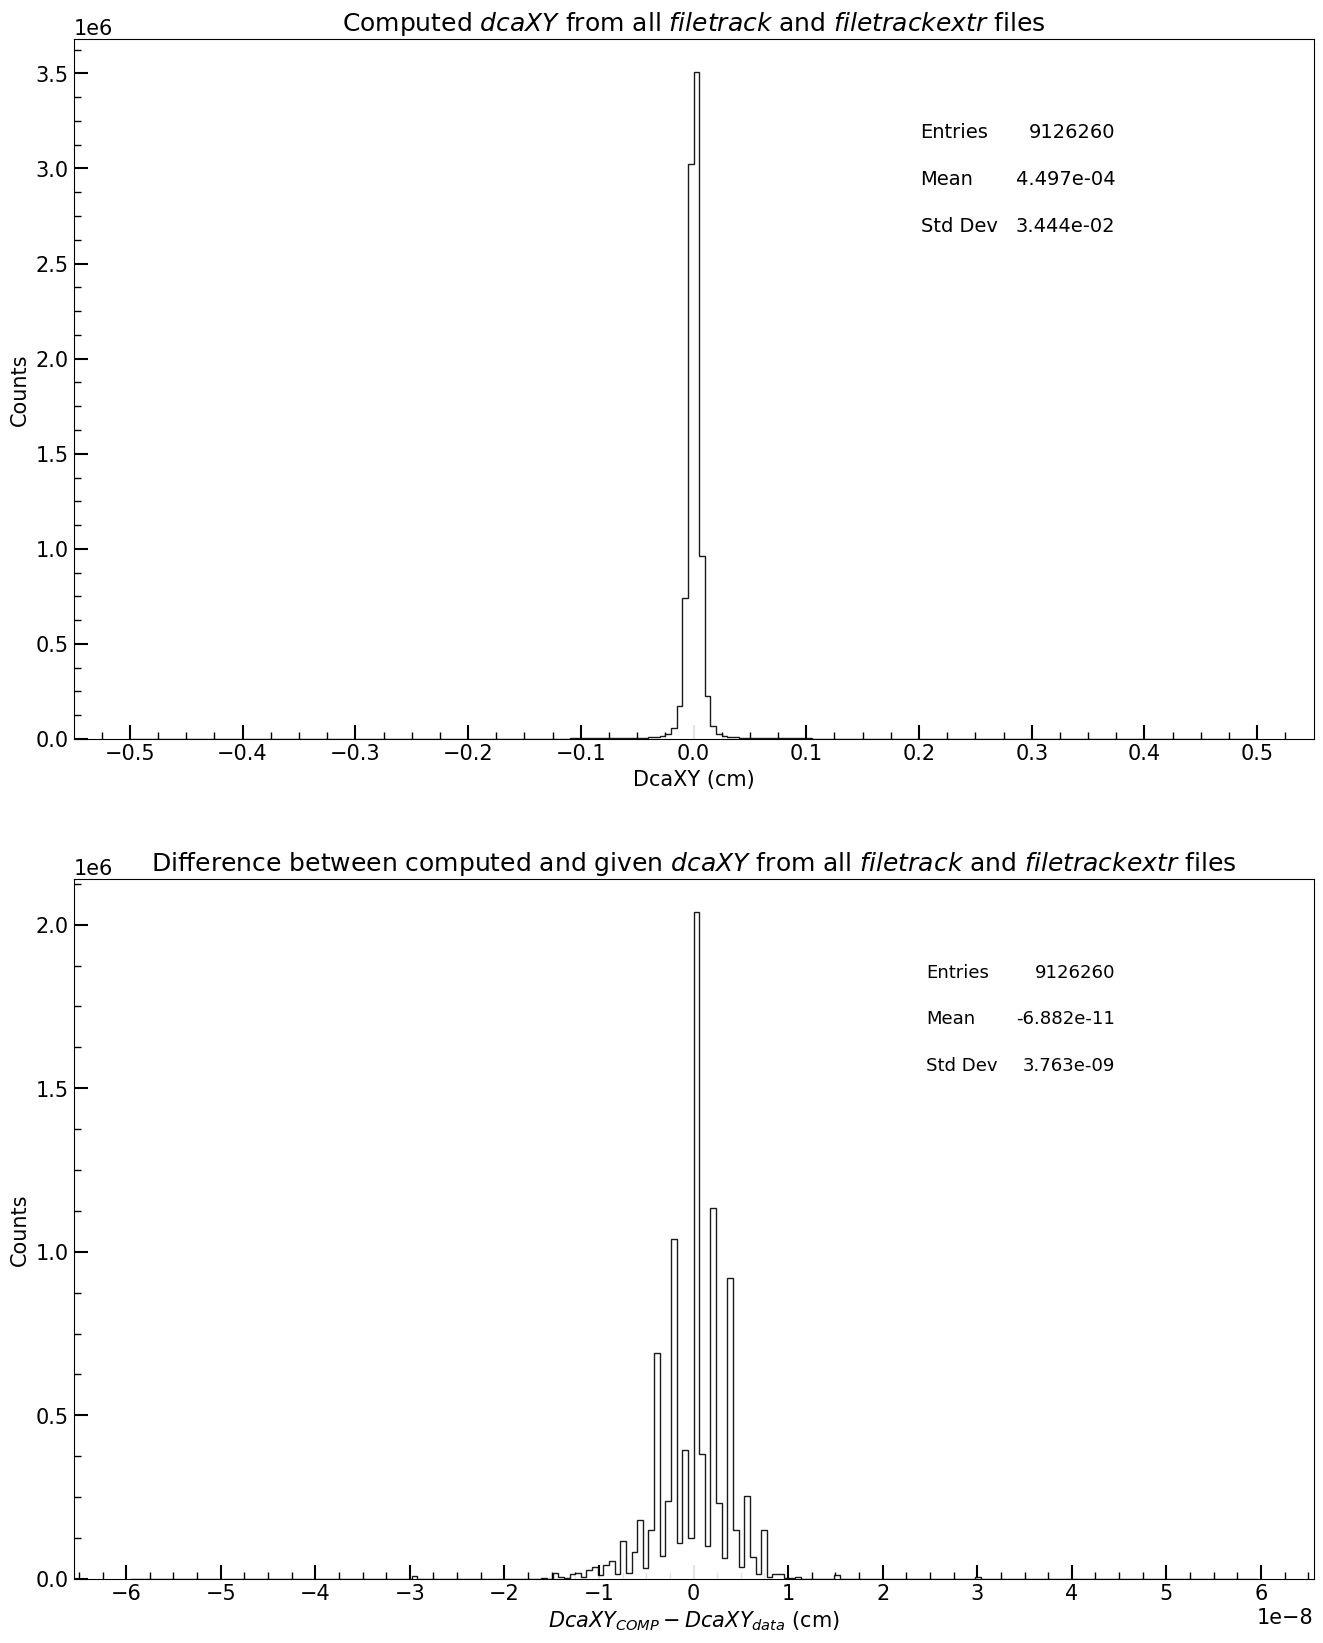

In [199]:
fig, axs = plt.subplots( nrows = 2, ncols = 1, figsize=( 16, 20 ) )

def root_simple_histo( data, ax ) :
    ax.hist( x = data, bins = 200, edgecolor='black', alpha =0.9, histtype = 'step', align = 'mid', fill = True, facecolor = 'white')
    # ax.set_yscale('log')
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_major_locator(MultipleLocator(5e5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
    ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
    ax.set_ylabel( r"Counts")
    ax.table( 
        cellText = [[f"{data.shape[0]}"],[ f"{data.mean():.3e}"], [f"{data.std():.3e}"]],
        rowLabels = [ 'Entries', 'Mean', 'Std Dev'],
        loc = 'upper right',
        bbox = [ 0.75, 0.7, 0.1, 0.2 ],
        edges = 'open',
        rowLoc = 'left'
        )
root_simple_histo( data = DCA['DcaComp'], ax =  axs[ 0 ])
axs[0].set_title( r"Computed $dcaXY$ from all $filetrack$ and $filetrackextr$ files" )
axs[0].set_xlabel( r'DcaXY (cm)')
# axs[0].set_xlim( -0.5, 0.5 )

root_simple_histo( data = (DCA['DcaComp']-DCA['fDcaXY']), ax =  axs[ 1 ])
axs[1].set_title( r"Difference between computed and given $dcaXY$ from all $filetrack$ and $filetrackextr$ files" )
axs[1].set_xlabel( r'$DcaXY_{COMP} - DcaXY_{data}$ (cm)')
axs[1].xaxis.set_major_locator(MultipleLocator(1e-8))

# axs[1].set_xlim( -5e-2, 5e-2 )

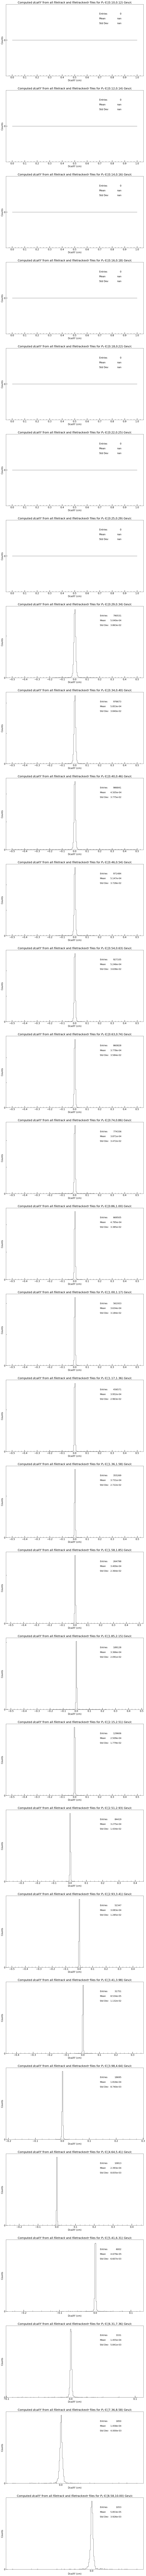

In [214]:
# analizing Dca distributions in narrow intervals of pt

subs = 30
# using a logaritmic division of the interval of pt
p_interval = np.logspace( -1, 1, subs+1 )


fig, axs = plt.subplots( nrows = subs, ncols = 1, figsize=( 16, 10*subs ) )
for i in range( subs ) :
    ax = axs[ i ]
    # trying to graph an interval distribution
    left = p_interval[ i ]
    right = p_interval[ i + 1 ]
    root_simple_histo( data = DCA['DcaComp'][ DCA['fPt'].between( left, right ) ], ax =  ax )
    ax.yaxis.set_major_locator(MultipleLocator(1e3))
    ax.set_title( r"Computed $dcaXY$ from all $filetrack$ and $filetrackextr$ files for $P_{T}\in$" + f"[{left:.2f},{right:.2f}) Gev/c" )
    ax.set_xlabel( r'DcaXY (cm)')
    # axs[0].set_xlim( -0.5, 0.5 )


Text(0, 0.5, 'Impact Parameter resolution ($\\mu m$)')

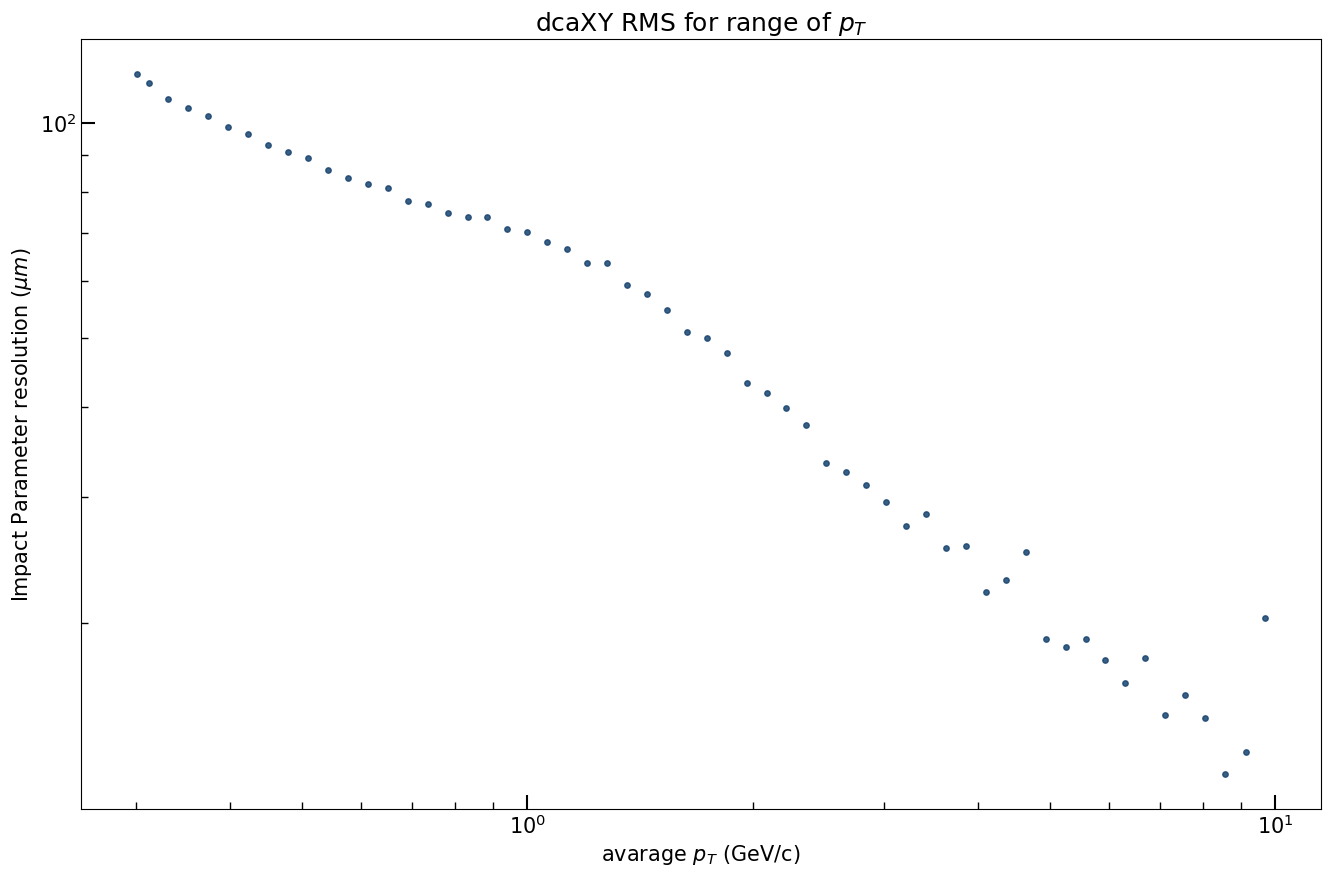

In [233]:
# computing mean and rms for each subset,
# computing the rms over the restricted data
# limiting it to the set with data

def rms( x ) :
    return np.power( np.mean( np.power( x , 2 ) ), 0.5)

subs = 75
# using a logaritmic division of the interval of pt
p_interval = np.logspace( -1, 1, subs+1 )

rms_v = np.zeros( subs )
means = np.zeros( subs )
centers = np.zeros( subs )

for i in range( subs ) :
    left = p_interval[ i ]
    right = p_interval[ i + 1 ]
    # centers[ i ] = ( left + right ) / 2.0
    pt_slice =  DCA['DcaComp'][ DCA['fPt'].between( left, right ) ]
    m = pt_slice.mean()
    rm = rms( pt_slice )
    rm_slice = pt_slice[ pt_slice.between( m - 2.5 * rm, m + 2.5 * rm ) ]
    centers[ i ] = DCA.loc[ DCA['fPt'].between( left, right ) & DCA['DcaComp'].between( m - 2.5 * rm, m + 2.5 * rm ) ][ 'fPt' ].mean()
    means[ i ] = rm_slice.mean() * 1e4 # to convert into \mu m
    rms_v[ i ] = rms( rm_slice ) * 1e4 # to convert into \mu m


fig, ax = plt.subplots( ncols = 1, nrows= 1, figsize=( 16, 10 ) )
ax.scatter( x = centers , y = rms_v, alpha=0.85, color='#17436f', marker='o', s=15 )
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params( which = 'major', direction = 'in', length = 10, width = 1.5 )
ax.tick_params( which = 'minor', direction = 'in', length = 5, width = 1 )
ax.set_title( r"dcaXY RMS for range of $p_{T}$" )
ax.set_xlabel( r'avarage $p_{T}$ (GeV/c)')
ax.set_ylabel( r"Impact Parameter resolution ($\mu m$)")

